<a href="https://colab.research.google.com/github/Mayank0195/Capstone_Project_ML_Regression_Rossmann_Sales_PredictionRoss/blob/main/Rossmann_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly 
import plotly.graph_objs as go
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing drive on the volab notebook for the easy access of the data provided 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the pathway for the Rossmann Stores Data.csv
dataset_sales_data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Regression/Rossmann_Stores_Data.csv',parse_dates = True, index_col = 'Date')
dataset_sales_data.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [4]:
dataset_store=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Regression/store.csv')
dataset_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
dataset_sales_data.count()

Store            1017209
DayOfWeek        1017209
Sales            1017209
Customers        1017209
Open             1017209
Promo            1017209
StateHoliday     1017209
SchoolHoliday    1017209
dtype: int64

In [6]:
dataset_store.count()

Store                        1115
StoreType                    1115
Assortment                   1115
CompetitionDistance          1112
CompetitionOpenSinceMonth     761
CompetitionOpenSinceYear      761
Promo2                       1115
Promo2SinceWeek               571
Promo2SinceYear               571
PromoInterval                 571
dtype: int64

In [7]:
dataset_sales_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [8]:
dataset_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [9]:
dataset_sales_data.shape

(1017209, 8)

In [10]:
dataset_store.shape

(1115, 10)

In [11]:
dataset_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [12]:
dataset_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
dataset_sales_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
dataset_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


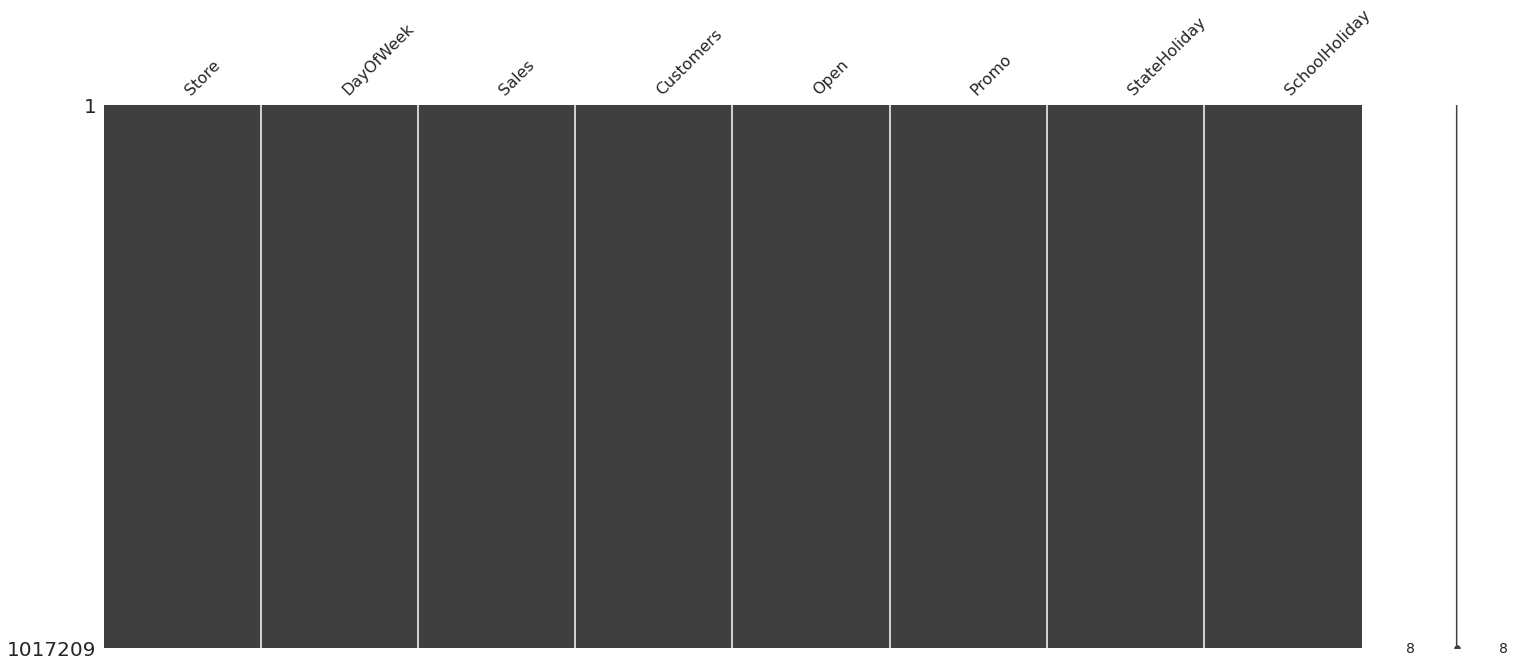

In [15]:
import missingno as msno
msno.matrix(dataset_sales_data)
plt.show()

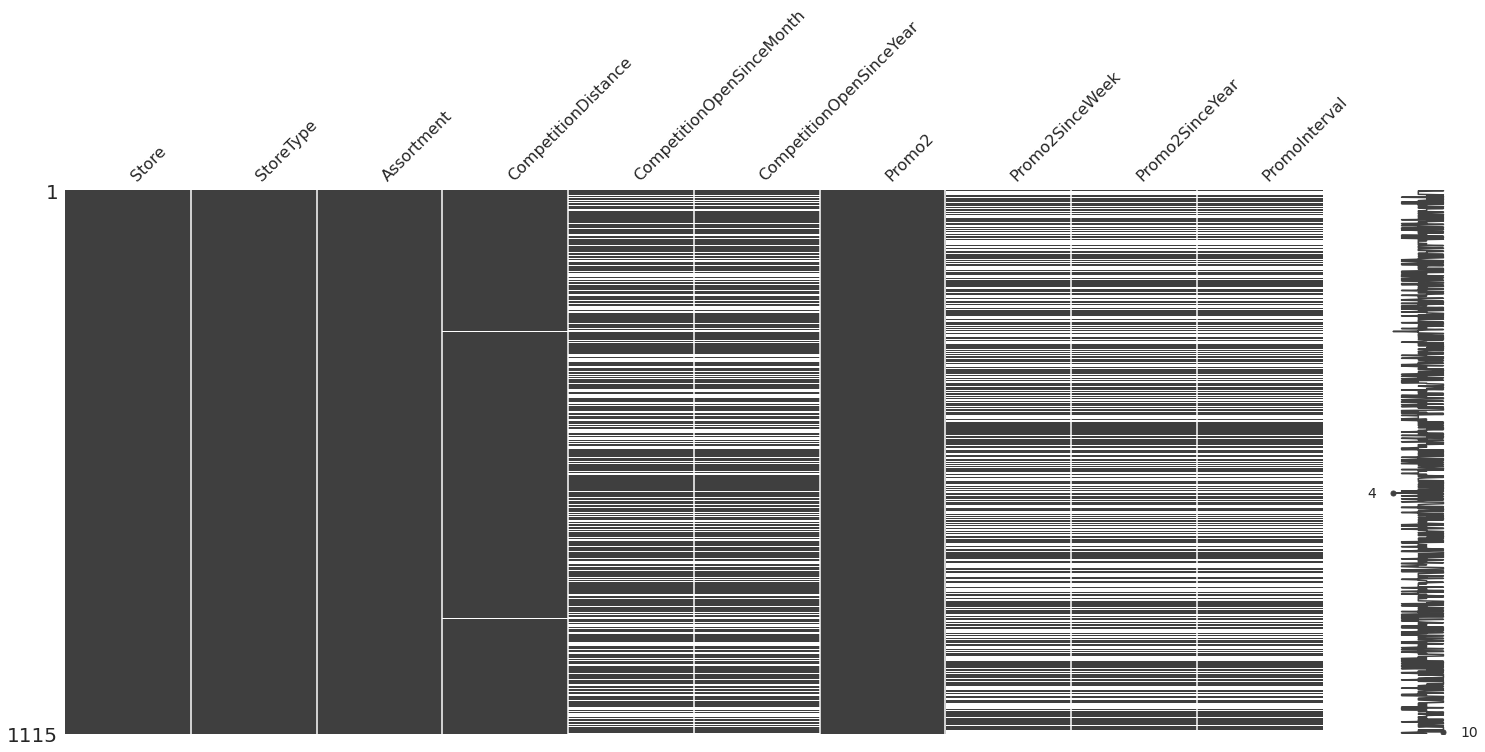

In [16]:
import missingno as msno
msno.matrix(dataset_store)
plt.show()

### **2.2.2 Remove features with high percentages of missing values**

we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [17]:
# remove features# remove features
dataset_store = dataset_store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)


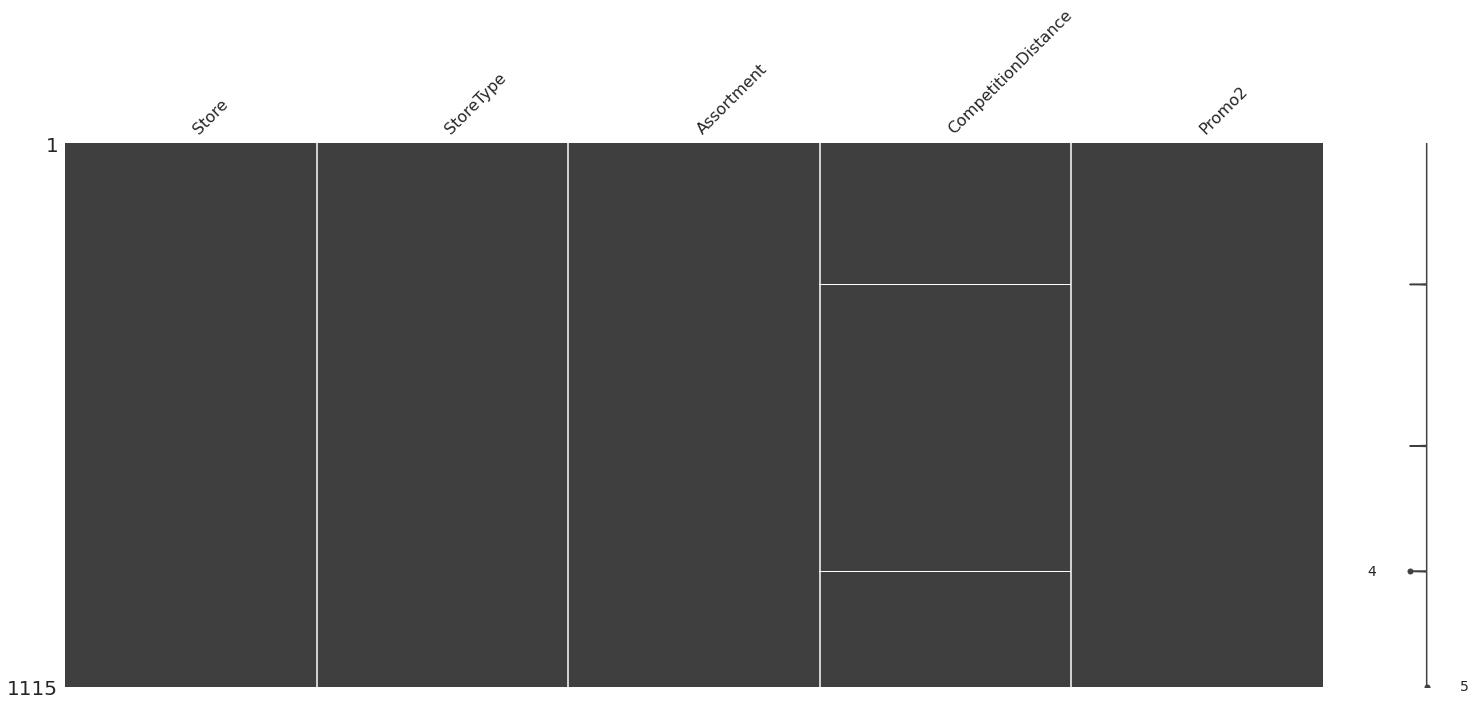

In [18]:
import missingno as msno
msno.matrix(dataset_store)
plt.show()

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

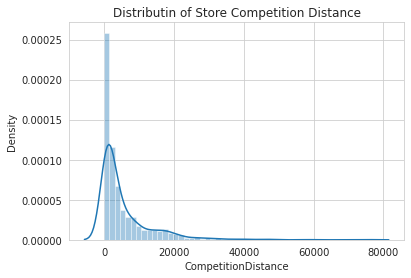

In [19]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(dataset_store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

## **The distribution is right skewed, so we'll replace missing values with the median.**

In [20]:
# replace missing values in CompetitionDistance with median for the store dataset
dataset_store.CompetitionDistance.fillna(dataset_store.CompetitionDistance.median(), inplace=True)

In [21]:
# extract year, month, day and week of year from "Date"
dataset_sales_data['Year'] = dataset_sales_data.index.year
dataset_sales_data['Month'] = dataset_sales_data.index.month
dataset_sales_data['Day'] = dataset_sales_data.index.day
dataset_sales_data['WeekOfYear'] = dataset_sales_data.index.weekofyear
dataset_sales_data = dataset_sales_data.reset_index()

# **2.4 Joining Tables**

In [22]:
df = pd.merge(dataset_sales_data, dataset_store, how='left', on='Store')
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [23]:
len(df)

1017209

## **2.5 Drop Subsets Of Data Where Might Cause Bias**

In [24]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
df = df[df.Open != 0]

In [25]:
# Open isn't a variable anymore, so we'll drop it
df = df.drop('Open', axis=1)

In [26]:
# see if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [27]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [28]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

## **2.6 Feature Engineering**

In [29]:
# see what variable types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Store                844338 non-null  int64         
 2   DayOfWeek            844338 non-null  int64         
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  object        
 7   SchoolHoliday        844338 non-null  int64         
 8   Year                 844338 non-null  int64         
 9   Month                844338 non-null  int64         
 10  Day                  844338 non-null  int64         
 11  WeekOfYear           844338 non-null  int64         
 12  StoreType            844338 non-null  object        
 13  Assortment   

In [30]:
# see what's in nominal varibles 
set(df.StateHoliday), set(df.StoreType), set(df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [31]:
# StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# convert number 0 to string 0
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [32]:
# make a copy in case I mess up anything 
df1 = df.copy()

# **2.6.1 Create new variable "AvgSales"**

Create a variable that calculates monthly average sales for each store

In [33]:
# calculate weekly average sales
sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [34]:
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [35]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)
# merge
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))
df1

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,sales_key,AvgSales
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0,201571,4491.333333
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1,201572,4954.259259
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1,201573,6797.592593
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,0,201574,10256.851852
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,0,201575,4599.629630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864289,2013-01-01,682,2,3375,566,0,a,1,2013,1,1,1,b,a,150.0,0,20131682,11115.806452
864290,2013-01-01,733,2,10765,2377,0,a,1,2013,1,1,1,b,b,860.0,0,20131733,12984.677419
864291,2013-01-01,769,2,5035,1248,0,a,1,2013,1,1,1,b,b,840.0,1,20131769,7854.806452
864292,2013-01-01,948,2,4491,1039,0,a,1,2013,1,1,1,b,b,1430.0,0,20131948,4475.741935


# **2.6.2 Create new variable "AvgCustomer"**
create a variable that calculates Monthly average number of customers for each store, becuase daily number of customer is another variable to be predicted

In [36]:
# calculate weekly average
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [37]:
df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [38]:
# drop original feature Customers
df1 = df1.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [39]:
# merge
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

## **2.6.3 Transform Variable "StateHoliday"**

In [40]:
# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [41]:
# drop extra columns
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)

# **3. Exploratory Data Analysis**

In [55]:
# becasue my computer keeps crashing, I had to sample the dataset 
dfv = df.sample(n=5000, random_state=1)

### **3.1 Correlation Heatmap**
create a heatmap to see correlation between all variables

In [43]:
corr = df1.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

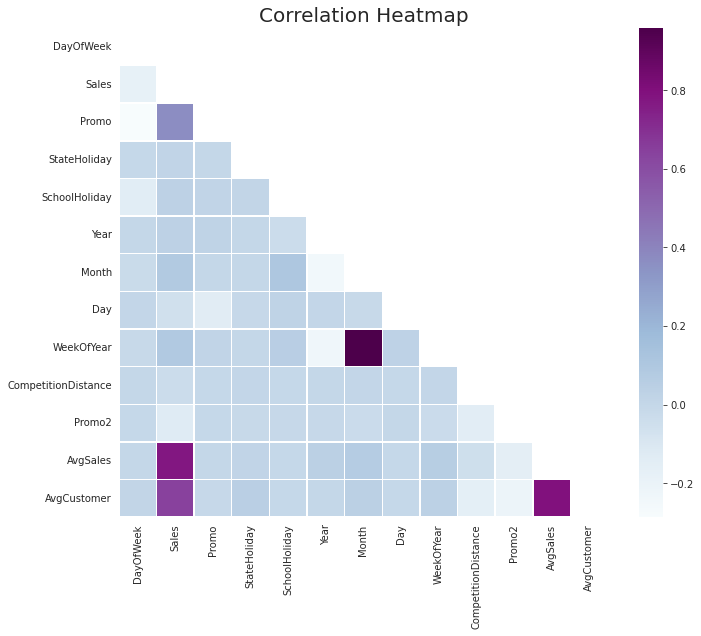

In [44]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

In [57]:
promo0 = dfv.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = dfv.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

Text(0, 0.5, 'Sales')

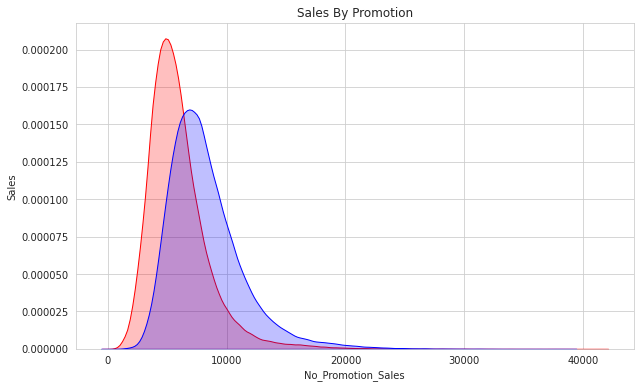

In [52]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(x1, shade=True, color="r")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("Sales By Promotion")
plt.ylabel('Sales')

Text(0.5, 1.0, 'Pair Plot')

<Figure size 432x288 with 0 Axes>

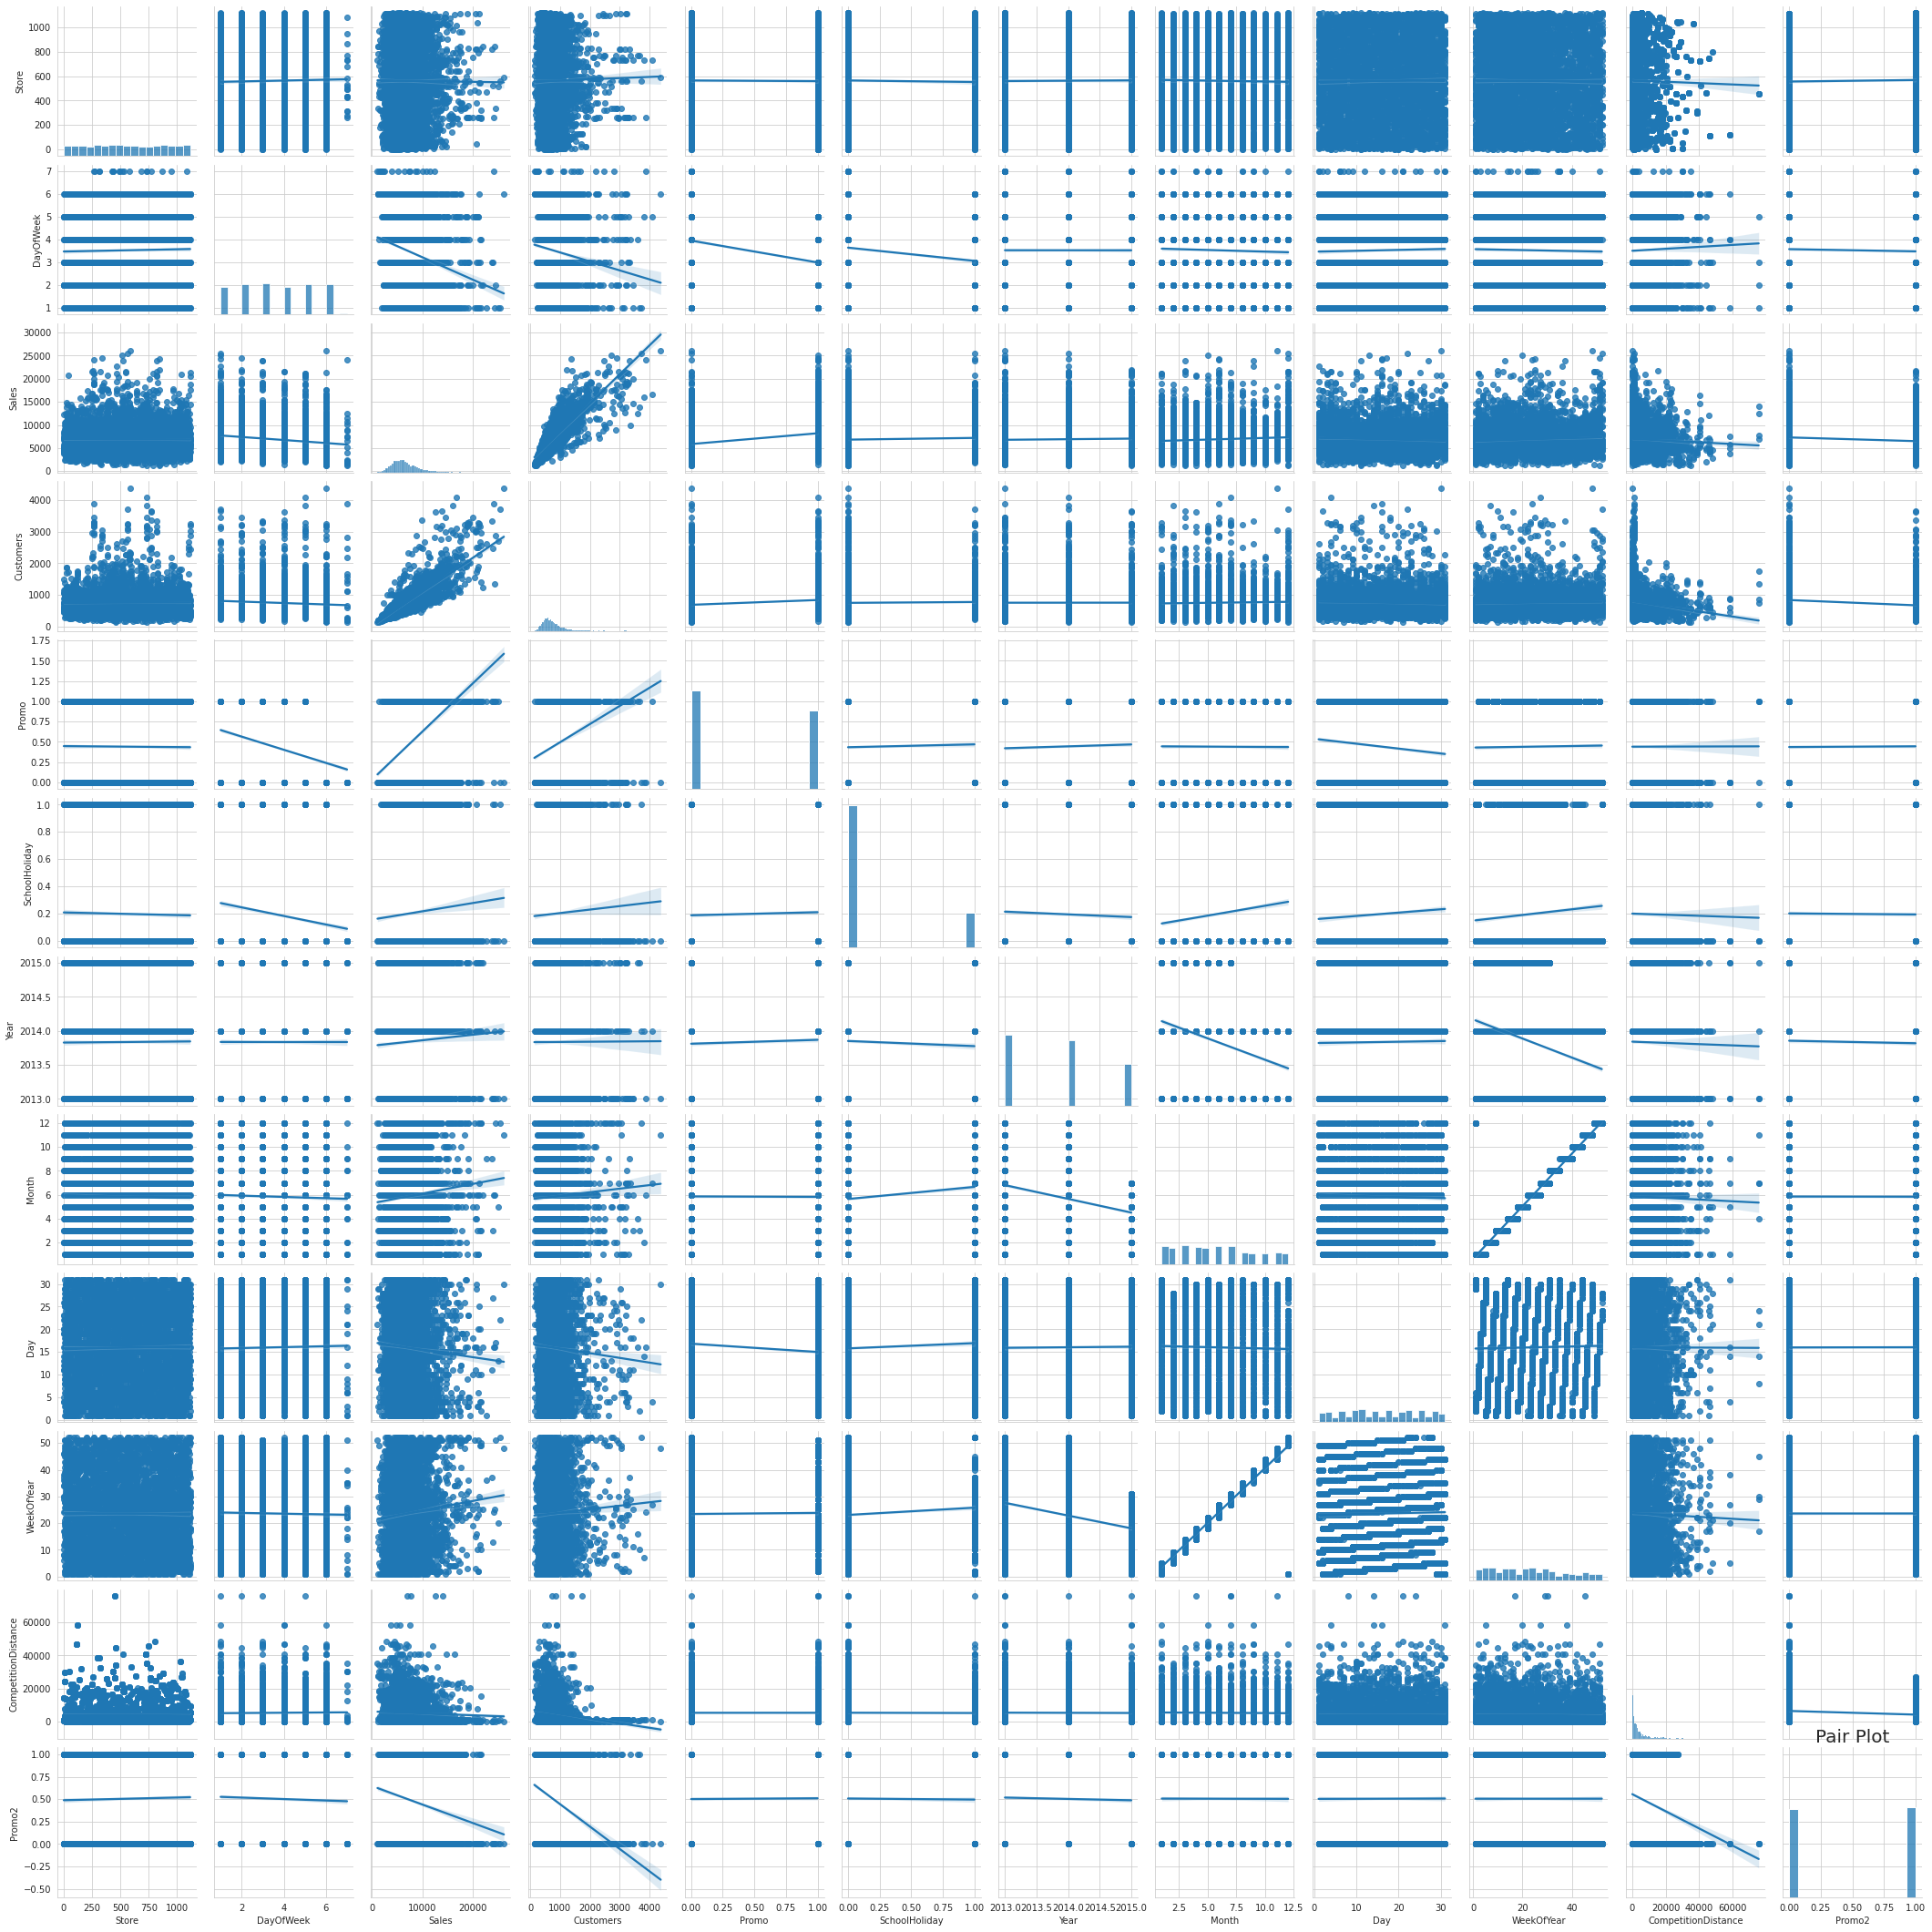

In [56]:
plt.figure()
sns.pairplot(dfv, kind='reg')
plt.title('Pair Plot', fontsize=20)

## **4. Store Sales Prediction**

In [48]:
# split features and labels
X = df1.drop('Sales', axis=1)
y = df1. Sales

In [49]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [ ]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [ ]:
# split training and test datasets
from sklearn.cross_validation import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)